In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Linear Regression Training


In Machine Learning, vectors are represented as column vectors which are 2D arrays with a single column. If the models' parameter vector(containing bias term and feature weights) and instance's feature vector are column vectors, then prediction  is a matrix multiplication. This gives the same prediction but it will be represented as a single cell matrix rather than a scalar-value.

The Normal Equation
The objective of a regression is to find the best fit whilst keeping the cost function low. Hence our objective is to find the value of features that minimizes cost function. We will first introduce the concept of a closed form solution (AKA a mathematical equation that gives this result directly - Normal Equation)

In [2]:
# Generating some linear data to visualize & test this data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure linear_data_generated


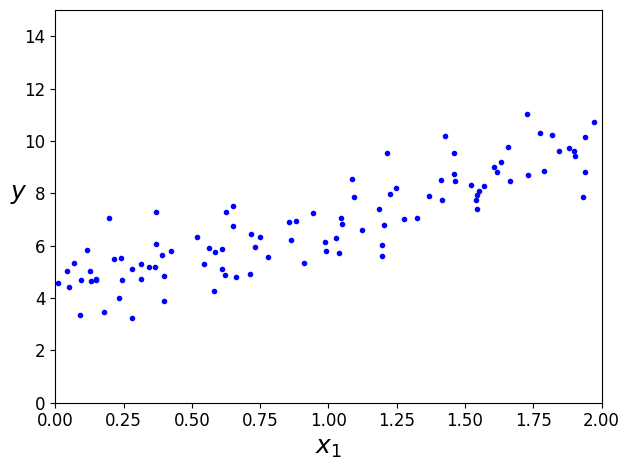

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("linear_data_generated")
plt.show()

Computing Normal Equation using inv() function from NumPy's Linear Algebra Module (np.linalg). This allows us to compute the inverse of a matrix and the dot() method for matrix multiplication.

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

Recall that we originally set y = 4 + 3x + Gaussian Noise
However, the model returned us (theta_best) : y = 4.21 + 2.77 [Close enough]. Due to the gaussian noise we introduced, it is near impossible to 100% recover the exact parameters of our original equation.

In [10]:
## Making predictions using our theta_best model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure theta_best linear_data_generated


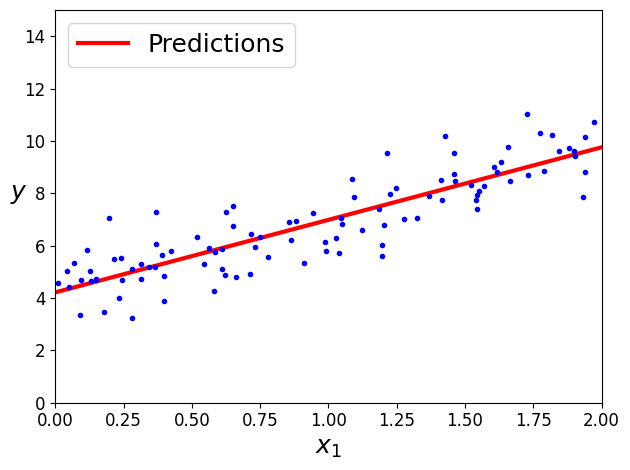

In [13]:
## Plotting the model's prediction 
plt.plot(X_new, y_predict,"r-", linewidth = 3, label = "Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.legend(loc="upper left",fontsize=18)
save_fig("theta_best linear_data_generated")
plt.show()

Now that we understand how to do this using numpy, we can use scikit learn to make it easier

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)
## This gives us the same results as if we had done it manually

array([[4.21509616],
       [9.75532293]])

In [23]:
## Using scikit learn also allows us to use the LinearRegression Class and its scipy.linalg.lstsq() function to find the least square values. 
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
## Again, this gives us the exact same as if we had done it manually, this function computes the pseudoinverse of X (Specifically the moore-penrose inverse.)
## Alternatively, we could also use the np.linalg.pinv() function to find the pseudoinverse directly


array([[4.21509616],
       [2.77011339]])

In [24]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])